In [19]:
import pandas as pd, numpy as np

In [20]:
train_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\train.csv'
test_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\test.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
# train = pd.read_csv("../input/train.csv")
# test = pd.read_csv("../input/train.csv")



In [21]:
# data = train+test
data = train

In [22]:
from sklearn.preprocessing import Normalizer

target_col = 'SalePrice'

target = data[target_col]

# test_y= test[target_col]
test_y= None

data.drop(columns=target_col, inplace=True)

features = data

rating_cols = ['ExterQual' 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
rating_score = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
rating_cols2 = {'BsmtFinType1', 'BsmtFinType2'}
rating_score2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}

ignore_cols = ['BsmtExposure']
features.drop(columns=ignore_cols, inplace=True)
test_x= test.drop(columns=ignore_cols, inplace=True)


# print(data.isnull().sum(axis=1))   



#new
normalizer = Normalizer(copy=False)
normalizer.fit([target])

target = normalizer.transform([target]).flatten().astype('float64')

features.describe()
# target.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [23]:
from sklearn import preprocessing


# print(data.isnull().sum(axis=1))   

features.replace(-np.Inf, np.nan)
features.replace(np.Inf, np.nan)
features.replace(np.nan, 0)
features = features.fillna(0)

dtype_grp = features.columns.to_series().groupby(data.dtypes).groups

for dtype in dtype_grp:
    print(dtype_grp[dtype])

    
for dtype in dtype_grp:
    if dtype=='int64' :
        for col in dtype_grp[dtype]:
            features[col] = features[col].fillna(0.0)
            features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
            features[col] = features[col].astype('float64')
    elif dtype=='float64' :
        for col in dtype_grp[dtype]:
            features[col] = features[col].fillna(0.0)
            features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
            features[col] = features[col].astype('float64')
    elif dtype=='object' :
        for col in dtype_grp[dtype]:
            if col in rating_cols:
                features[col].replace(rating_score, regex=True, inplace=True)
                features[col] = features[col].fillna(0.0)
                features[col] = features[col].astype('float64')
            elif col in rating_cols2:
                features[col].replace(rating_score2, regex=True, inplace=True)
                features[col] = features[col].fillna(0.0)
                features[col] = features[col].astype('float64')
            else:
                try:
                    le = preprocessing.LabelEncoder()
                    enc = preprocessing.OneHotEncoder()
                    le.fit(features[col].astype(str))
                    label_enc_feature_val = le.transform(features[col].astype(str))
                    features[col] = label_enc_feature_val.astype('float64')

#                     enc.fit([label_enc_feature_val])  
#                     hot_enc_feature_val = enc.transform([label_enc_feature_val])

#                     print(hot_enc_feature_val)

#                     features.join(hot_enc_feature_val)
#                     features.drop(columns=col)
                except ValueError:
                    print(col)
                    print("Oops!  That was no valid number.  Try again...")



Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 

In [24]:
# print(data.isnull().sum(axis=1))
X = features.values
Y = target
# print(features.info())

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

# from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
    
def model_evaluation(X, Y, X_test, y_test, splitter, model, model_type, report, details):
    if model_type=="classification":
        accuracy = 0
        f1 = 0
        precision = 0
        recall = 0

    elif model_type=="regression":
        explained_variance_score_val = 0
        mean_absolute_error_val = 0
        mean_squared_error_val = 0
        mean_squared_log_error_val = 0
        median_absolute_error_val = 0
        r2_score_val = 0
    
    if report:
        print("*"*50, " START ", "*"*50)
        print("Spliter Description:")
        print(splitter)
        print("-"*100, "\n")
        print("Model Description:")
        print(model)
        print("-"*100,"\n")
      
    if splitter:
        i=0
        for train_index, test_index in splitter.split(X, Y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            model.fit(X_train, y_train)
            predict = model.predict(X_test)
            

            if model_type=="classification":
                accuracy_temp = metrics.accuracy_score(y_test, predict)
                precision_temp = metrics.precision_score(y_test, predict, average="micro")
                recall_temp = metrics.recall_score(y_test, predict, average="micro")
                f1_temp = metrics.f1_score(y_test, predict, average="micro")
                hamming_loss = metrics.hamming_loss(y_test, predict)

                accuracy = accuracy + accuracy_temp
                precision = precision + precision_temp
                recall = recall+ recall_temp
                f1= f1 + f1_temp

            elif model_type=="regression":
                explained_variance_score_temp = metrics.explained_variance_score(y_test, predict)
                mean_absolute_error_temp = metrics.mean_absolute_error(y_test, predict)
                mean_squared_error_temp = metrics.mean_squared_error(y_test, predict)
                mean_squared_log_error_temp = metrics.mean_squared_log_error(y_test, predict)
                median_absolute_error_temp = metrics.median_absolute_error(y_test, predict)
                r2_score_temp = metrics.r2_score(y_test, predict)


                explained_variance_score_val = explained_variance_score_val + explained_variance_score_temp
                mean_absolute_error_val = mean_absolute_error_val + mean_absolute_error_temp
                mean_squared_error_val = mean_squared_error_val + mean_squared_error_temp
                mean_squared_log_error_val = mean_squared_log_error_val + mean_squared_log_error_temp
                median_absolute_error_val = median_absolute_error_val + median_absolute_error_temp
                r2_score_val = r2_score_val + r2_score_temp
            
            if details:
                print("*"*25,  " ITERATION - ", i+1, "*"*25)
#                 print("TRAIN:", train_index, "TEST:", test_index)
                if model_type=="classification":
                    print("accuracy_score", accuracy_temp)
                    print("precision_score", precision_temp)
                    print("recall_score", recall_temp)
                    print("f1_score", f1_temp)
                    print("hamming_loss", hamming_loss)
                    precision, recall, thresholds = metrics.precision_recall_curve(y_test, predict)
                    print("average_precision_score", metrics.average_precision_score(y_test, predict, average="micro"))
                    print("fbeta_score", metrics.fbeta_score(y_test, predict))
                    print("roc_auc_score", metrics.roc_auc_score(y_test, predict, average="micro"))
                    print("-"*35)
                    print(metrics.classification_report(y_test, predict))
                    print("-"*35)
                    print("confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predict))
                    print("-"*35)
                    print("\n")

                elif model_type=="regression":
                    print("-"*35)
                    print("explained_variance_score_temp", explained_variance_score_temp)
                    print("mean_absolute_error_temp", mean_absolute_error_temp)
                    print("mean_squared_error_temp", mean_squared_error_temp)
                    print("mean_squared_log_error_temp", mean_squared_log_error_temp)
                    print("median_absolute_error_temp", median_absolute_error_temp)
                    print("r2_score_val", r2_score_val)
                    print("-"*35)
                    print("\n")
            i+=1

        split_num = splitter.get_n_splits()
        if model_type=="classification":
            accuracy = accuracy/split_num
            precision = precision/split_num
            recall = recall/split_num
            f1 = f1/split_num
            
        elif model_type=="regression":
            explained_variance_score_val = explained_variance_score_val/split_num
            mean_absolute_error_val = mean_absolute_error_val/split_num
            mean_squared_error_val = mean_squared_error_val/split_num
            median_absolute_error_val = median_absolute_error_val/split_num
            r2_score_val = r2_score_val/split_num

    else:
        model.fit(X, Y)
        predict = model.predict(X_test)
        if model_type=="classification":
            accuracy = metrics.accuracy_score(y_test, predict)
            precision = metrics.precision_score(y_test, predict, average="micro")
            recall = metrics.recall_score(y_test, predict, average="micro")
            f1 = metrics.f1_score(y_test, predict, average="micro")
            hamming_loss = metrics.hamming_loss(y_test, predict)
        elif model_type=="regression":
            explained_variance_score = explained_variance_score(y_test, predict)
            mean_absolute_error = mean_absolute_error(y_test, predict)
            mean_squared_error = mean_squared_error(y_test, predict)
            mean_squared_log_error = mean_squared_log_error(y_test, predict)
            median_absolute_error = median_absolute_error(y_test, predict)
            r2_score_temp = r2_score(y_test, predict)
    if report:
        if splitter:
            print("*"*50, " Average For", i+1, " Folds", "*"*50)
        if model_type=="classification":
            print("Average Accuracy Score: ", accuracy)
            print("Average pPrecision Score: ", precision)
            print("Average Recall Score: ", recall)
            print("Average F1 Score:", f1)
        
        elif model_type=="regression":
            print('%50s%s' % ("Average explained_variance_score: ", explained_variance_score_val))
            print('%50s%s' % ("Average mean_absolute_error: ", mean_absolute_error_val))
            print('%50s%s' % ("Average mean_squared_error: ", mean_squared_error_val))
            print('%50s%s' % ("Average mean_squared_log_error: ", mean_squared_log_error_val))
            print('%50s%s' % ("Average median_absolute_error: ", median_absolute_error_val))
            print('%50s%s' % ("Average r2_score: ", r2_score_val))
            print("\n")
            print("*"*100)
            print("*"*50, " END ", "*"*50)
    
    if model_type=="classification":
        return accuracy, precision, recall, f1
    elif model_type=="regression":
        return explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val


In [26]:
from sklearn.model_selection import train_test_split


# classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# regressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomTreesEmbedding, RandomForestRegressor, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, LogisticRegressionCV, logistic_regression_path, HuberRegressor, PassiveAggressiveRegressor, RandomizedLogisticRegression, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsRegressor, NearestNeighbors, RadiusNeighborsRegressor
from sklearn.neural_network import BernoulliRBM, MLPRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor


import gc

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
kf = KFold(n_splits = 5, random_state=None, shuffle =True)

classifiers = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BernoulliNB": BernoulliNB(),
#     "BernoulliRBM": BernoulliRBM(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
#     "GaussianMixture": GaussianMixture(),
#     "GaussianNB": GaussianNB(),
#     "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "KDTree": KDTree(),
#     "KNeighborsClassifier": KNeighborsClassifier(3),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MLPClassifier": MLPClassifier(),
    "MultinomialNB": MultinomialNB(),
#     "NearestNeighbors": NearestNeighbors(),
#     "NuSVC": NuSVC(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025),
    "SVC": SVC(),
    "SVC Gamma": SVC(gamma=2, C=1)
#     VotingClassifier: VotingClassifier(),
}

classifiers2 = {
#     "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
#     "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "KNeighborsClassifier": KNeighborsClassifier(3),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
#     "NuSVC": NuSVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025)
#     "SVC": SVC(),
#     "SVC Gamma": SVC(gamma=2, C=1)
}

classifiers3 = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025)
}


regressors = {
    "AdaBoostRegressor": AdaBoostRegressor(),
#     "ARDRegression": ARDRegression(),
    "BaggingRegressor": BaggingRegressor(),
#     "BernoulliRBM": BernoulliRBM(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
#     "GaussianMixture": GaussianMixture(),
#     "GaussianNB": GaussianNB(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "HuberRegressor": HuberRegressor(),
#     "IsotonicRegression": IsotonicRegression(),
    "KernelRidge": KernelRidge(),
#     "KDTree": KDTree(),
#     "KNeighborsRegressor": KNeighborsRegressor(),
#     "LinearRegression": LinearRegression(), 
#     "LogisticRegression": LogisticRegression(),
#     "LogisticRegressionCV": LogisticRegressionCV(),
#     "logistic_regression_path": logistic_regression_path(),
    "LinearSVR": LinearSVR(),
    "MLPRegressor": MLPRegressor(),
#     "MultinomialNB": MultinomialNB(),
    "NuSVR": NuSVR(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
#     "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
#     "RadiusNeighborsRegressor": RadiusNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
#     "RandomizedLogisticRegression": RandomizedLogisticRegression(),
#     "RANSACRegressor": RANSACRegressor(),
#     "SGDRegressor": SGDRegressor(),
    "SVR": SVR(),
    "TheilSenRegressor": TheilSenRegressor(),
}


    
splitter = kf 
# splitter = sss
# splitter = None
model_type = "regression"
report = 1
details = 1
evaluation = {}
X_test = None
y_test = None
print("Spliter Description:")
print(splitter)
        
        
for name in regressors:
    evaluation_temp = []    
    explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val = model_evaluation(X, Y, X_test, y_test, splitter, regressors[name], model_type, report, details=None)
    evaluation_temp.append(explained_variance_score_val)
    evaluation_temp.append(mean_absolute_error_val)
    evaluation_temp.append(mean_squared_error_val)
    evaluation_temp.append(mean_squared_log_error_val)
    evaluation_temp.append(median_absolute_error_val)
    evaluation_temp.append(r2_score_val)
    evaluation[name] = evaluation_temp
    

rows_list = []
for name in evaluation:
    rows_list.append([name]+evaluation[name])
                           
evaluation_pd = pd.DataFrame(rows_list, columns=['Model Name', 'explained_variance_score',  'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']) 

Spliter Description:
KFold(n_splits=5, random_state=None, shuffle=True)
**************************************************  START  **************************************************
Spliter Description:
KFold(n_splits=5, random_state=None, shuffle=True)
---------------------------------------------------------------------------------------------------- 

Model Description:
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
---------------------------------------------------------------------------------------------------- 

**************************************************  Average For 6  Folds **************************************************
                Average explained_variance_score: 0.7994763140618224
                     Average mean_absolute_error: 0.003264162240673686
                      Average mean_squared_error: 2.3776208361673663e-05
                  Average mean_squared_log_error: 0.00011056540038

**************************************************  Average For 6  Folds **************************************************
                Average explained_variance_score: 0.8252393334843555
                     Average mean_absolute_error: 0.002229515567926993
                      Average mean_squared_error: 1.8580019435774308e-05
                  Average mean_squared_log_error: 8.469370495928314e-05
                   Average median_absolute_error: 0.00139116534715431
                                Average r2_score: 0.8244576975215014


****************************************************************************************************
**************************************************  END  **************************************************
**************************************************  START  **************************************************
Spliter Description:
KFold(n_splits=5, random_state=None, shuffle=True)
-----------------------------------------------------------

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


**************************************************  Average For 6  Folds **************************************************
                Average explained_variance_score: 0.8485213107404841
                     Average mean_absolute_error: 0.002503294395637868
                      Average mean_squared_error: 1.6617662712517676e-05
                  Average mean_squared_log_error: 7.69878514147118e-05
                   Average median_absolute_error: 0.0015941510052288569
                                Average r2_score: 0.8484491663681208


****************************************************************************************************
**************************************************  END  **************************************************
**************************************************  START  **************************************************
Spliter Description:
KFold(n_splits=5, random_state=None, shuffle=True)
----------------------------------------------------------

In [ ]:
evaluation_pd
evaluation = evaluation_pd
# evaluation.drop(columns='Model Name', inplace=True)
evaluation_pd

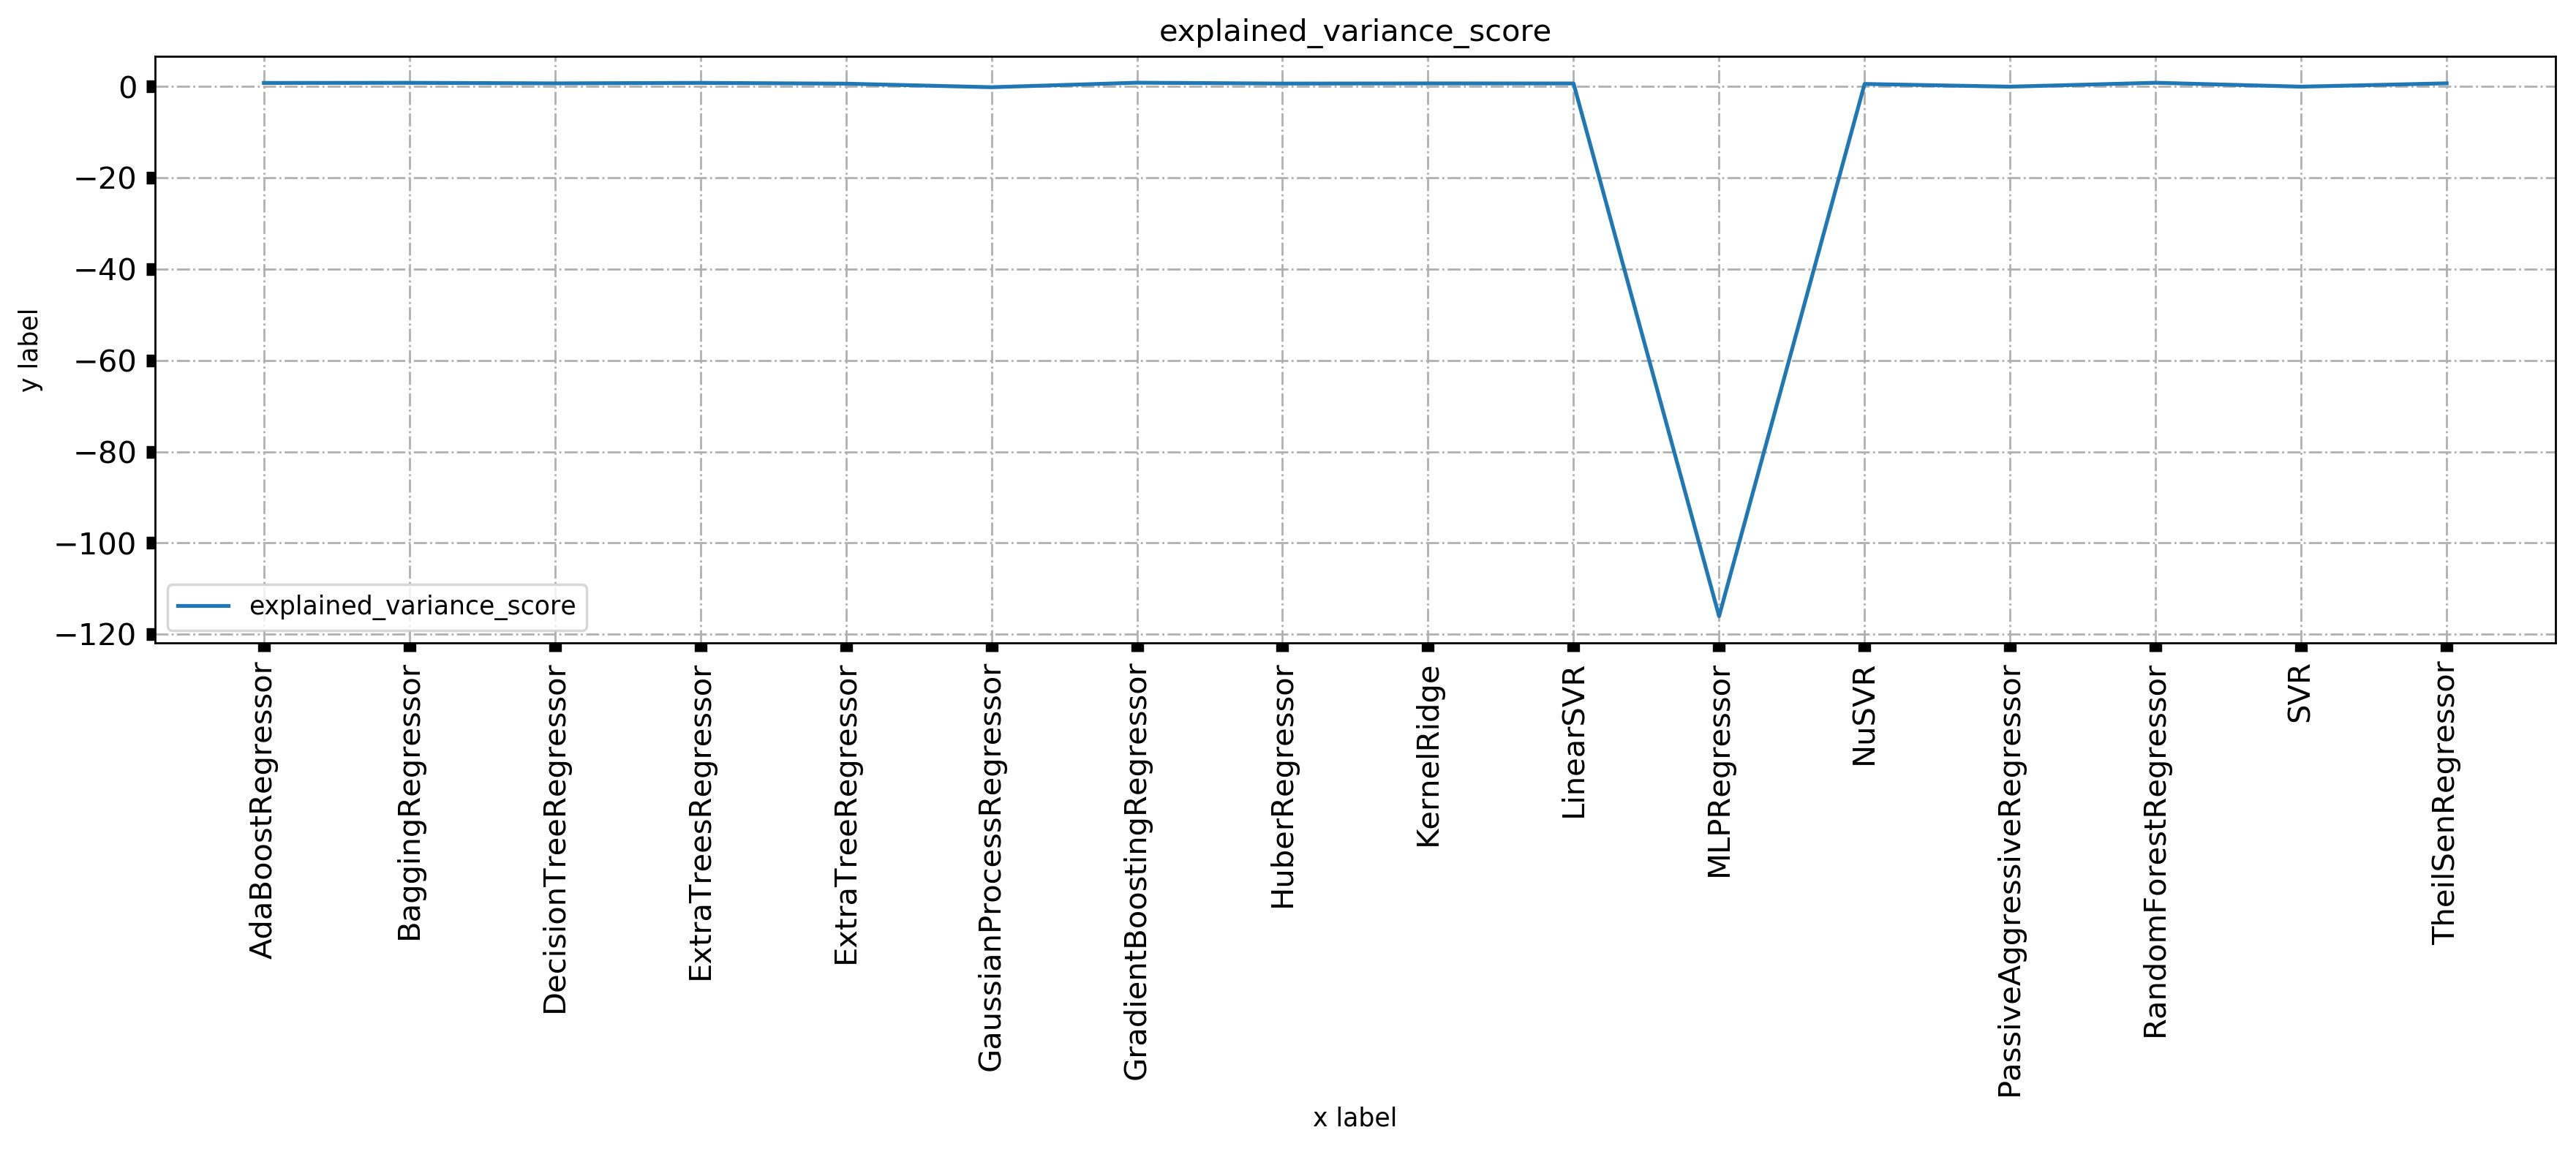

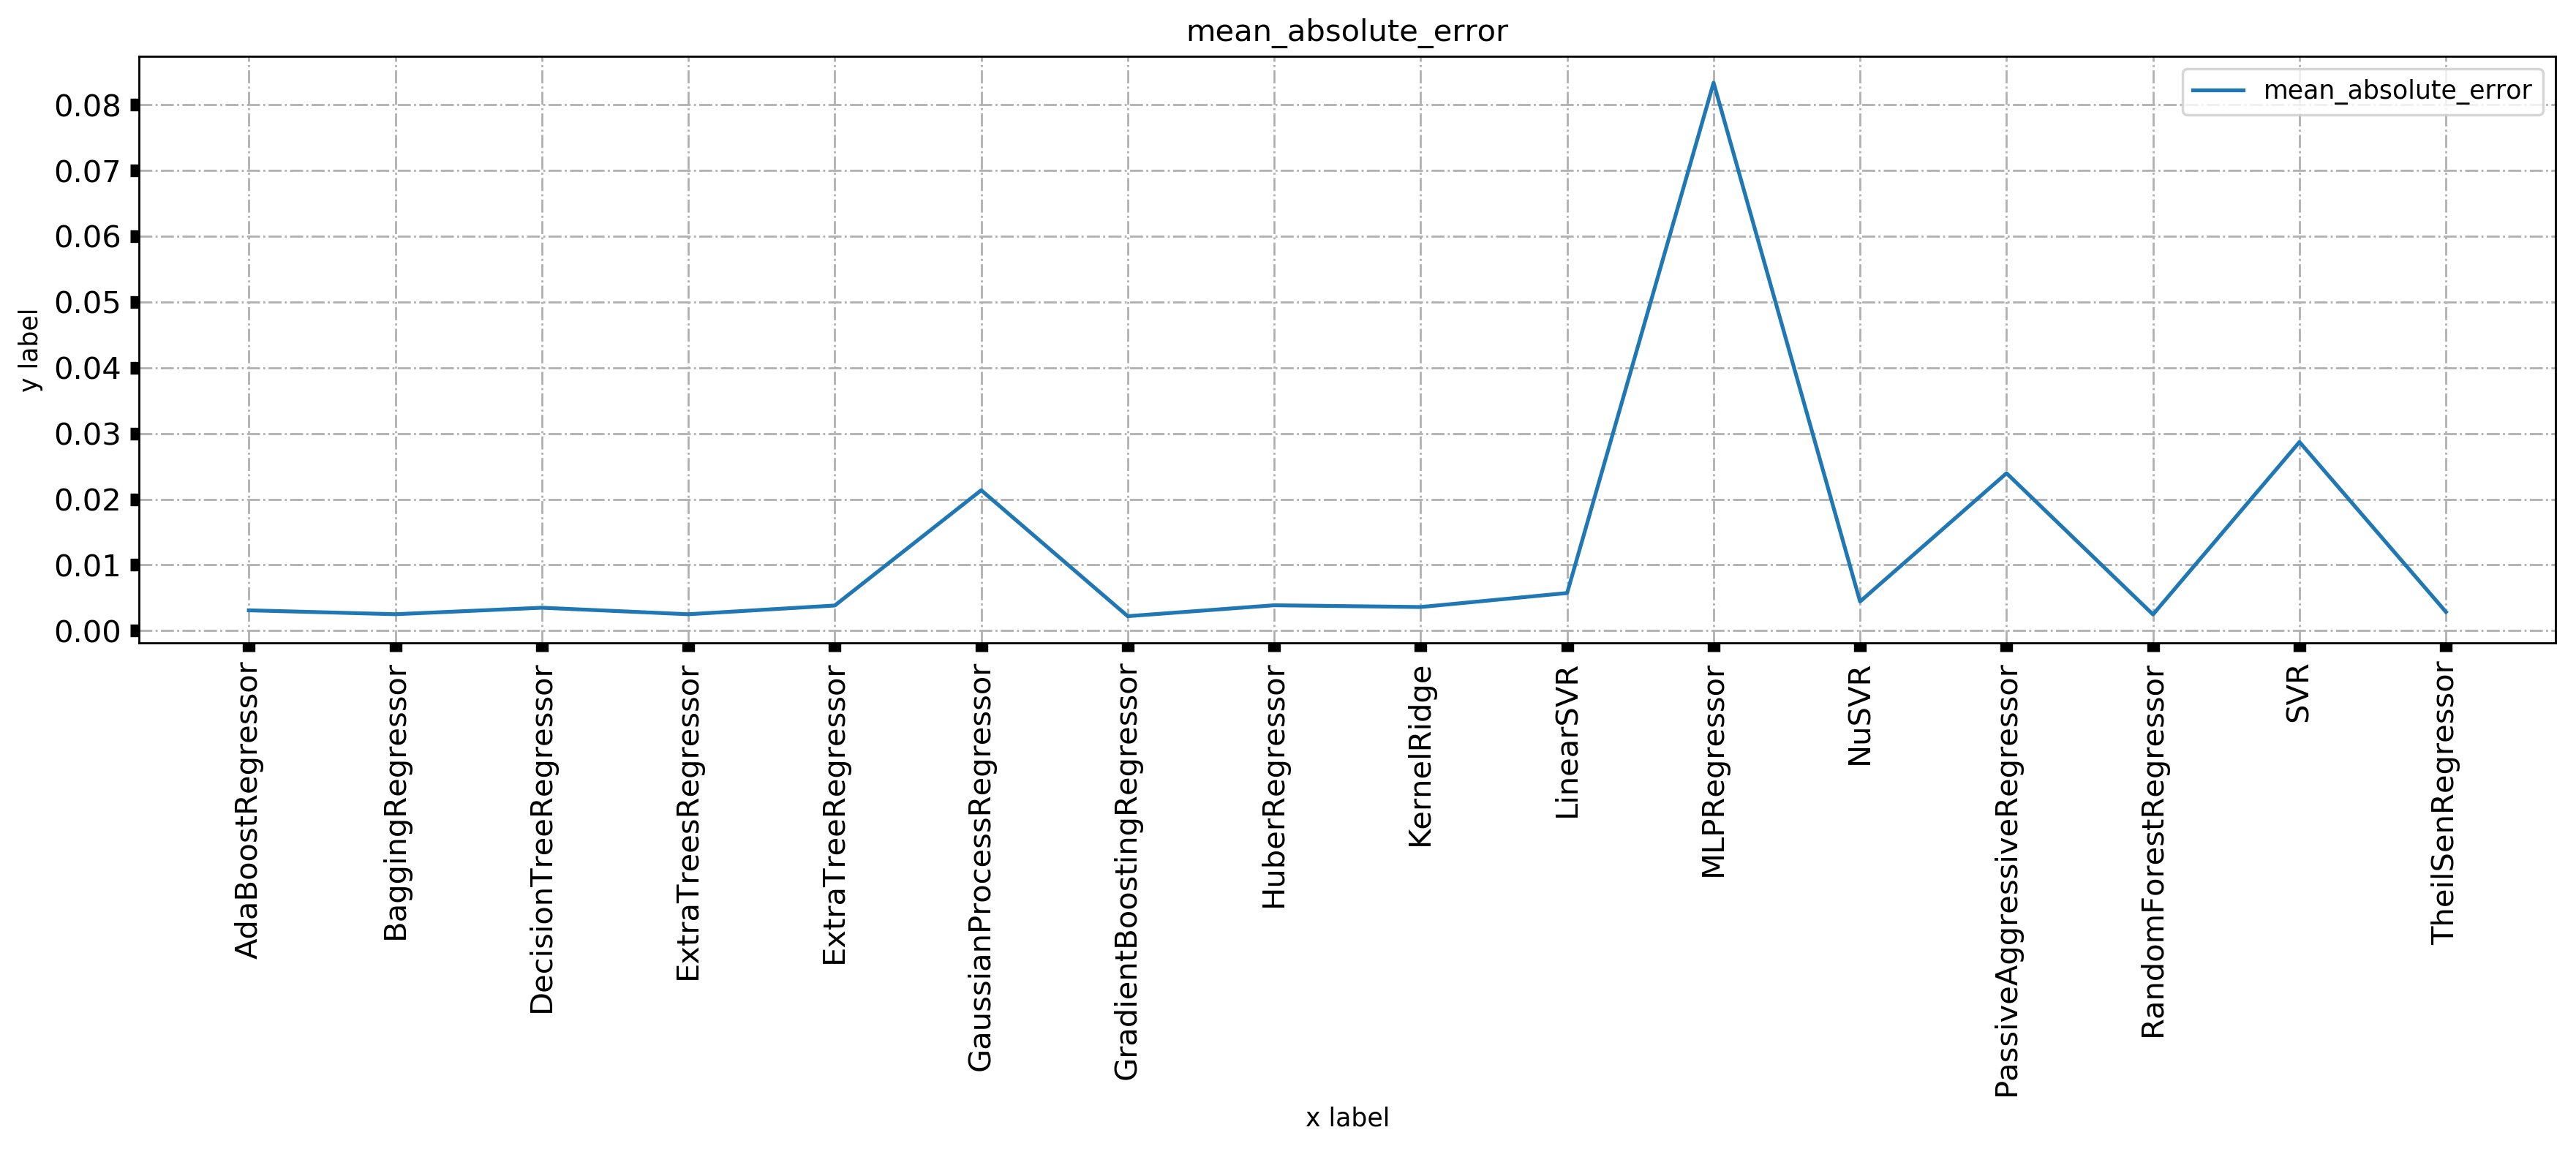

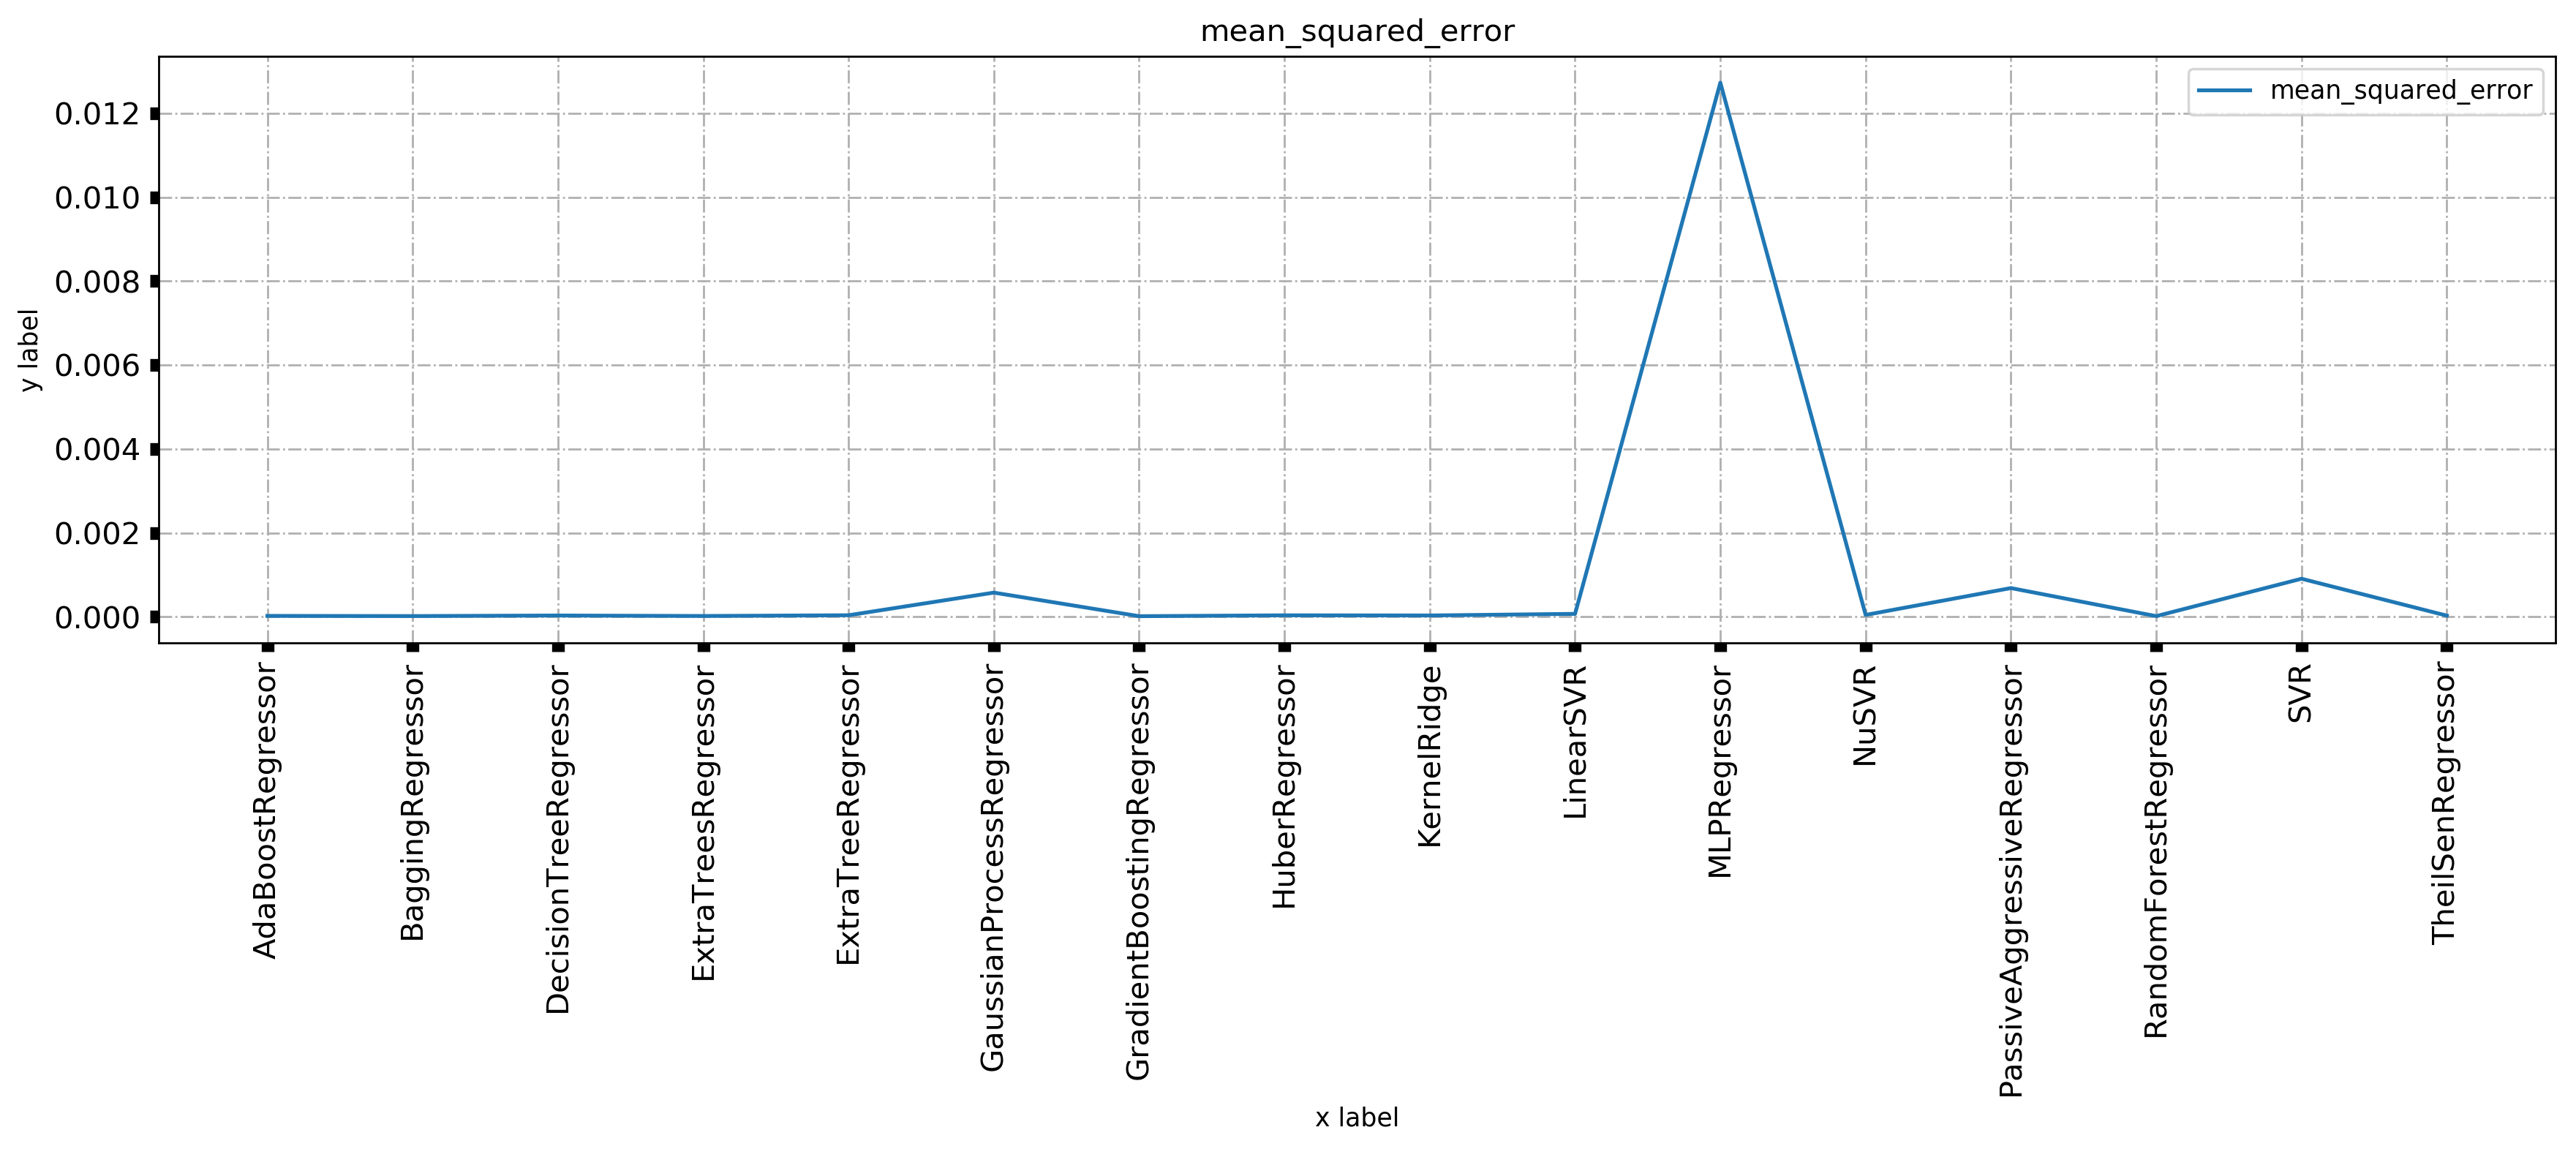

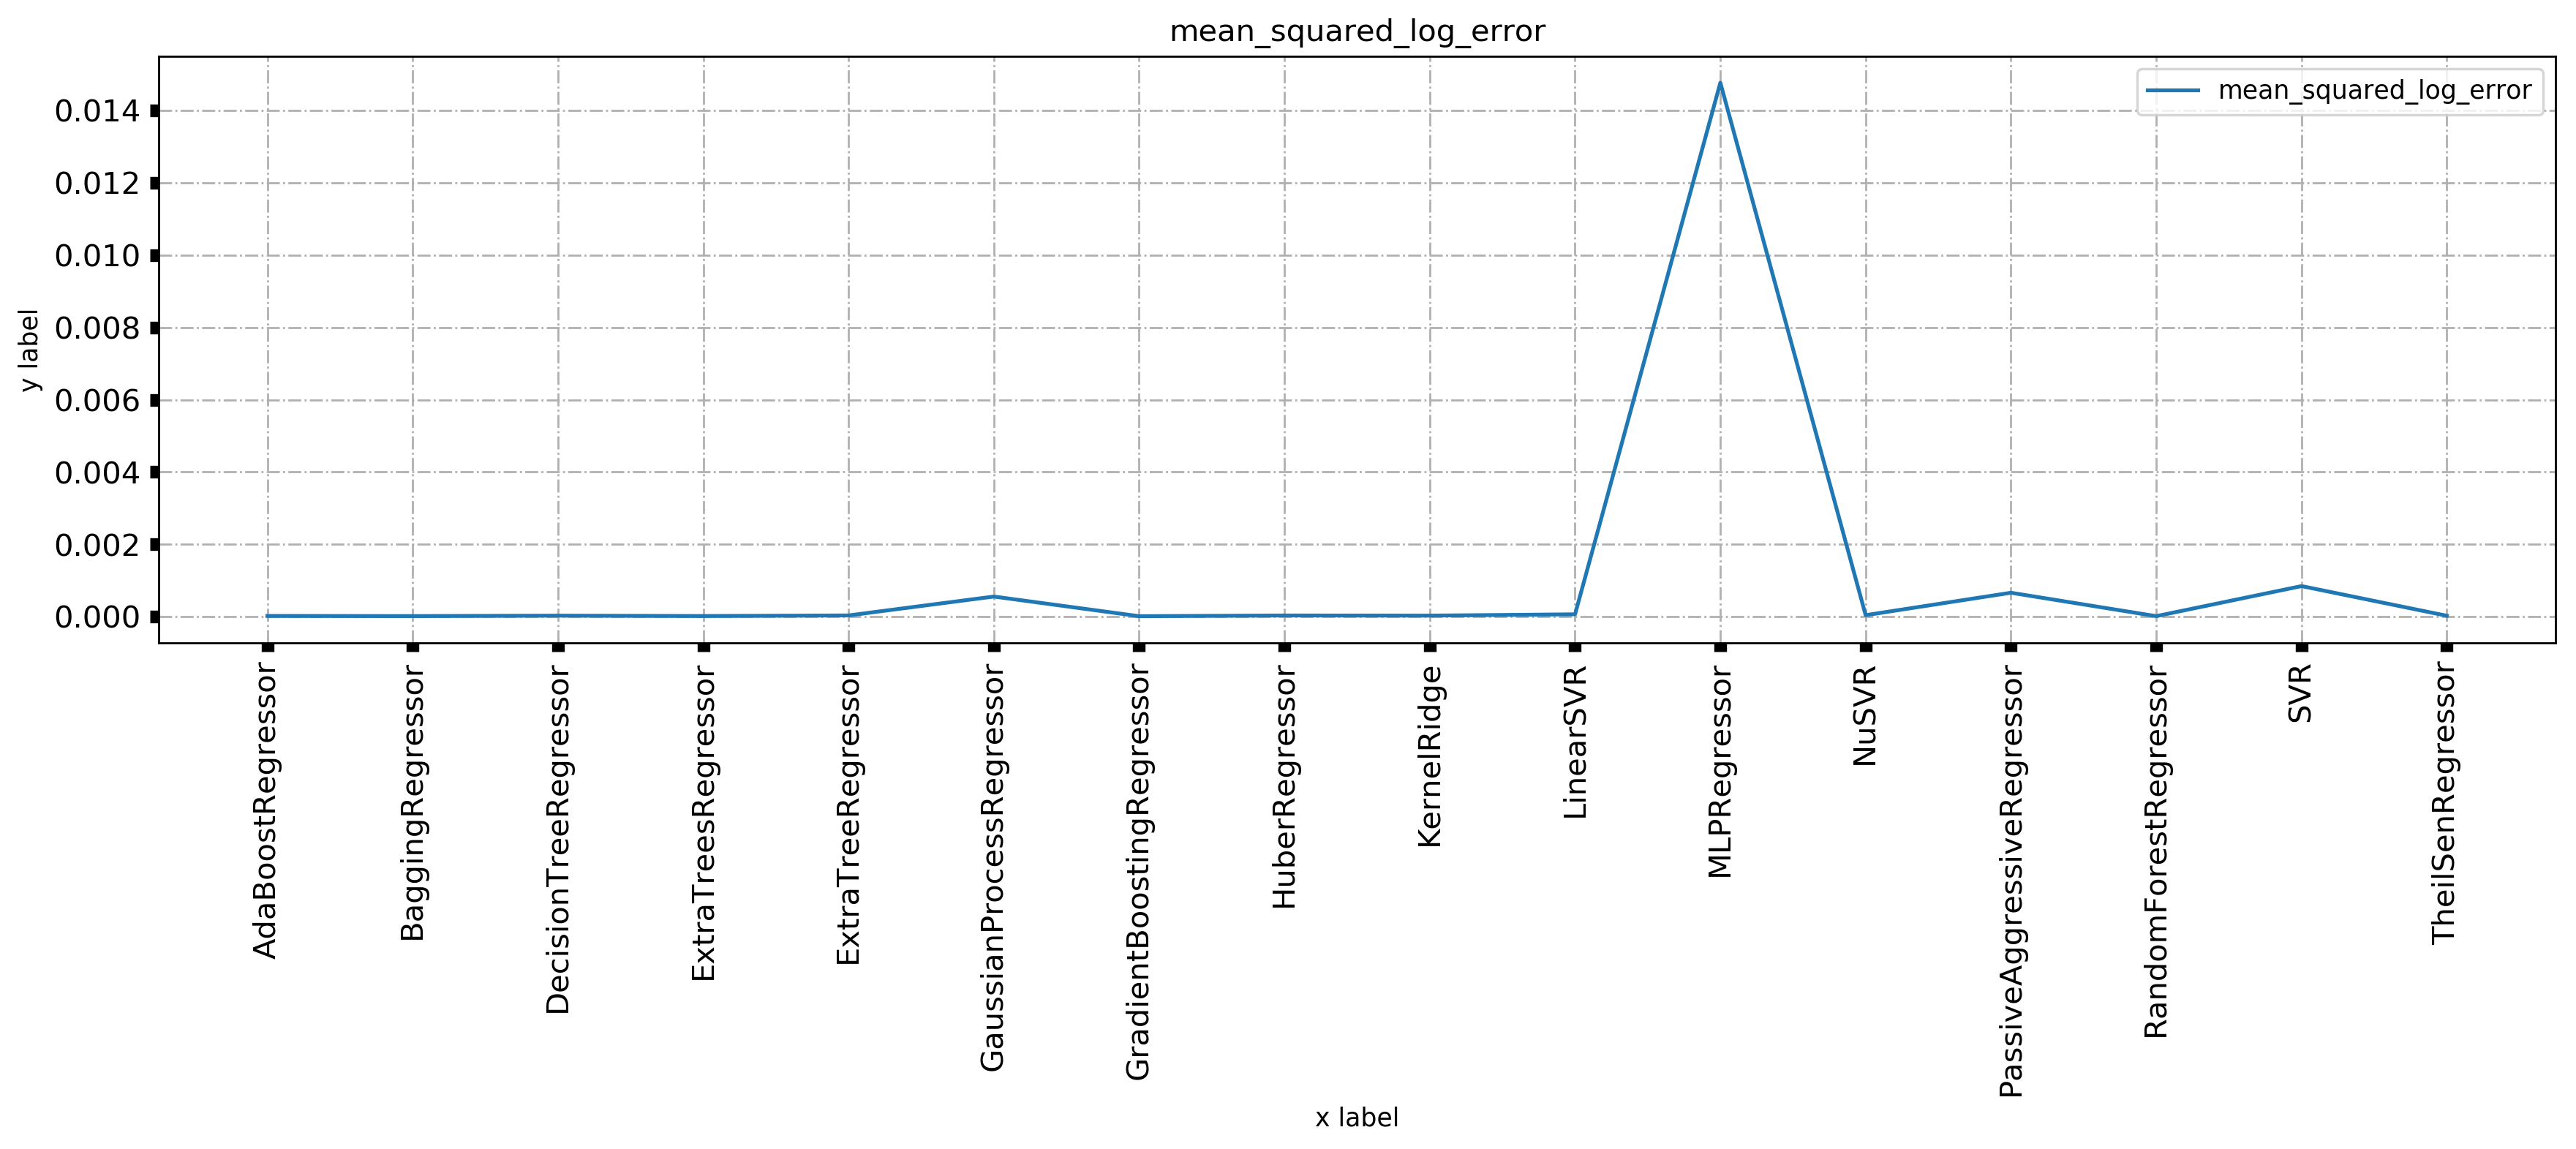

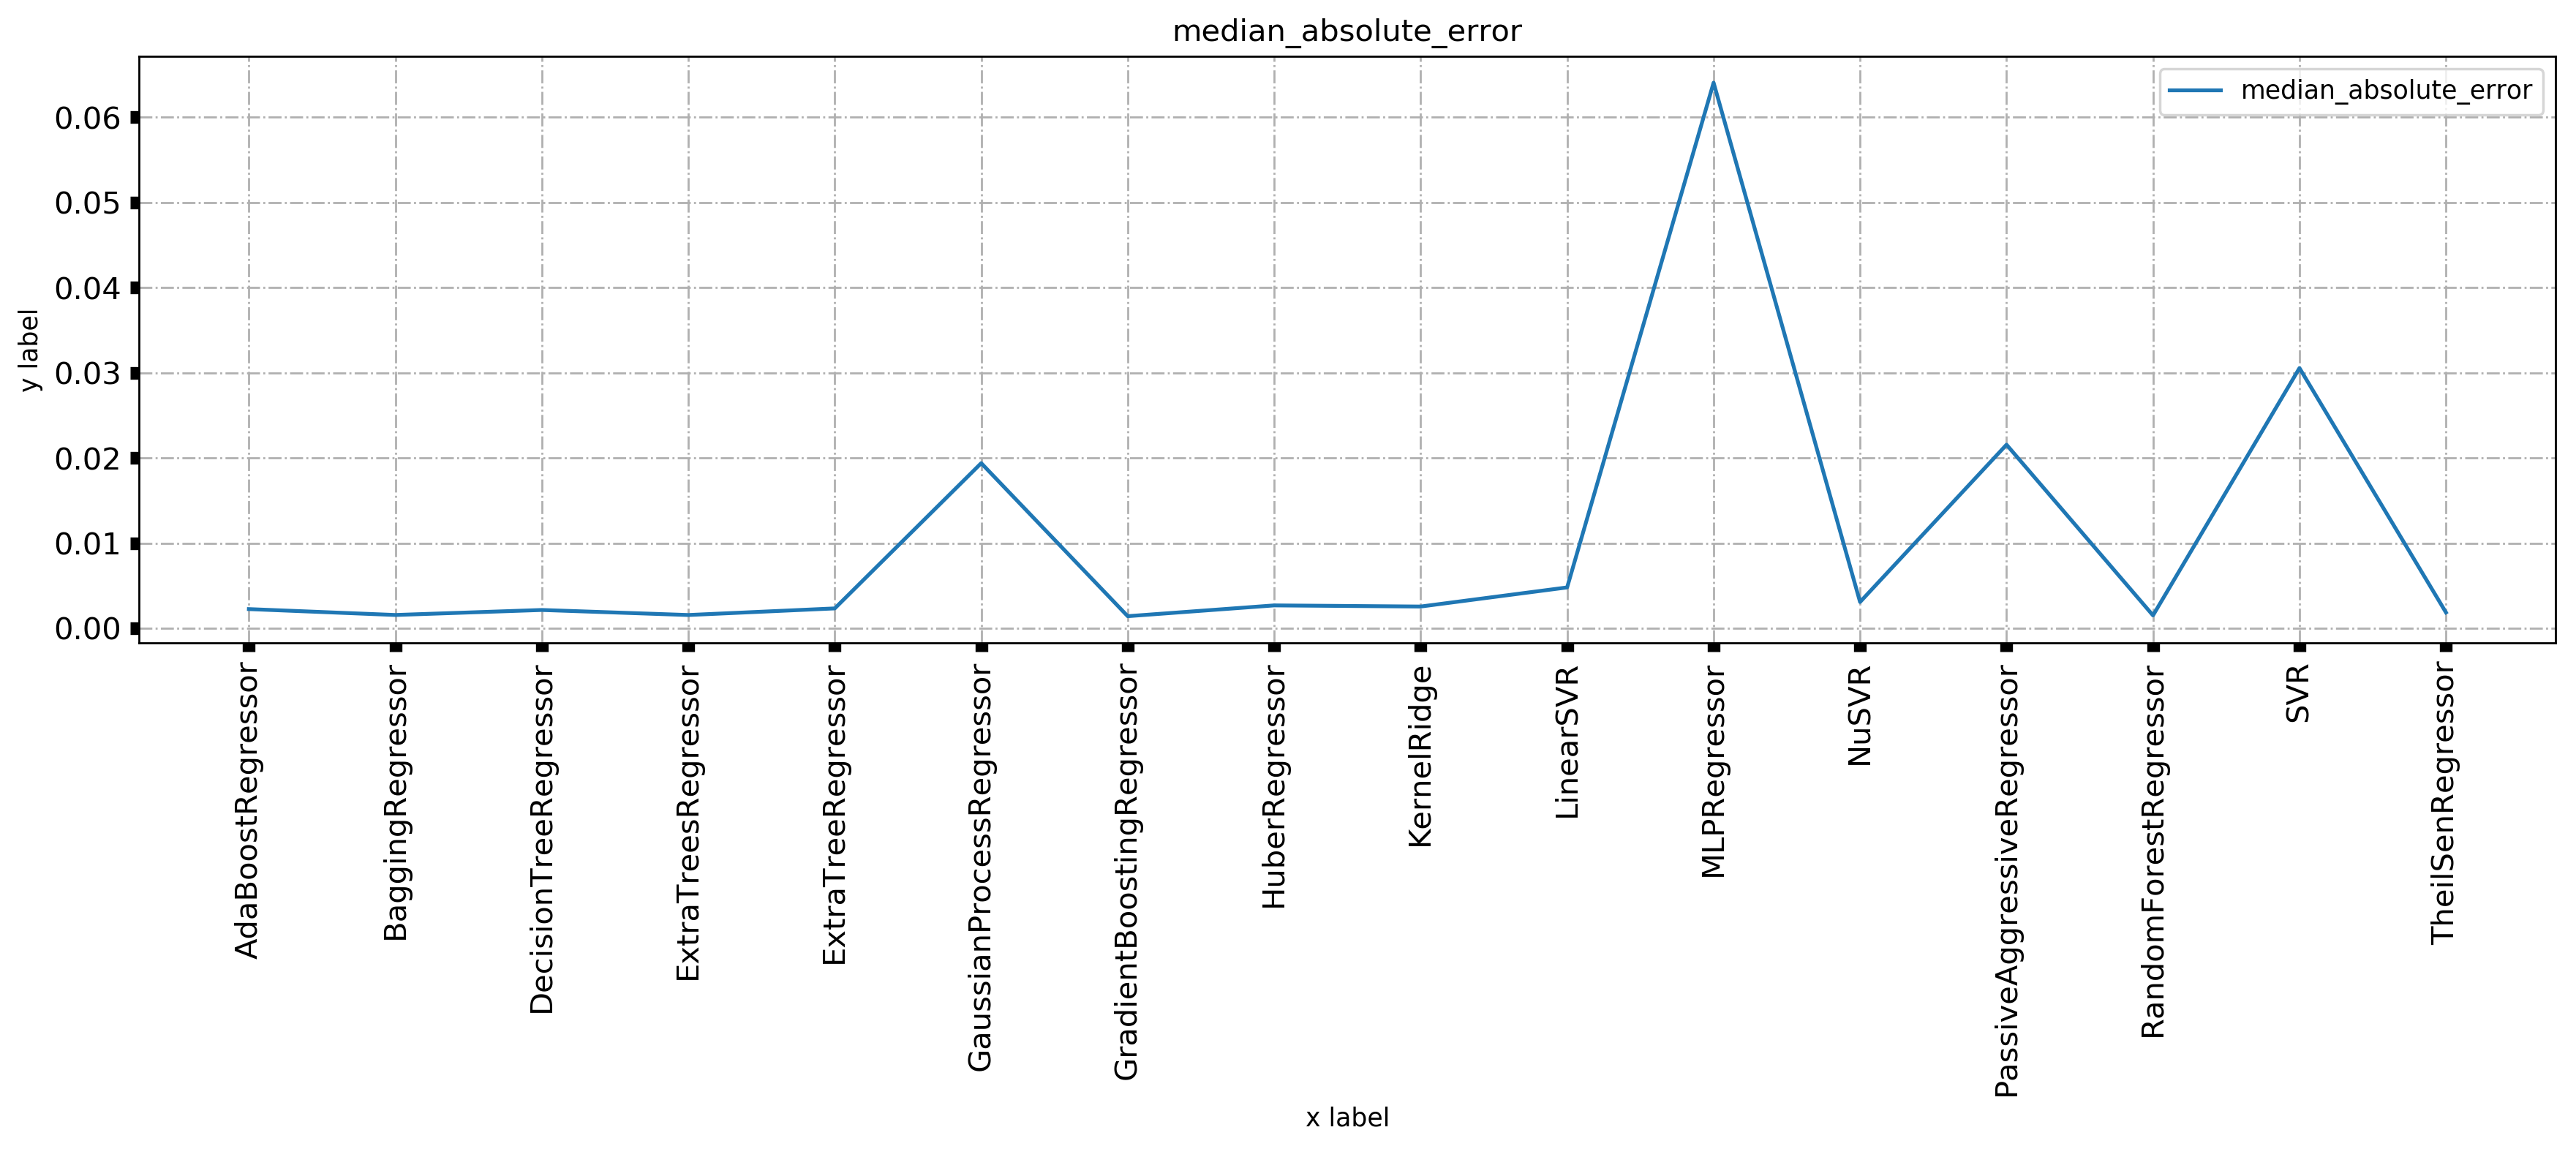

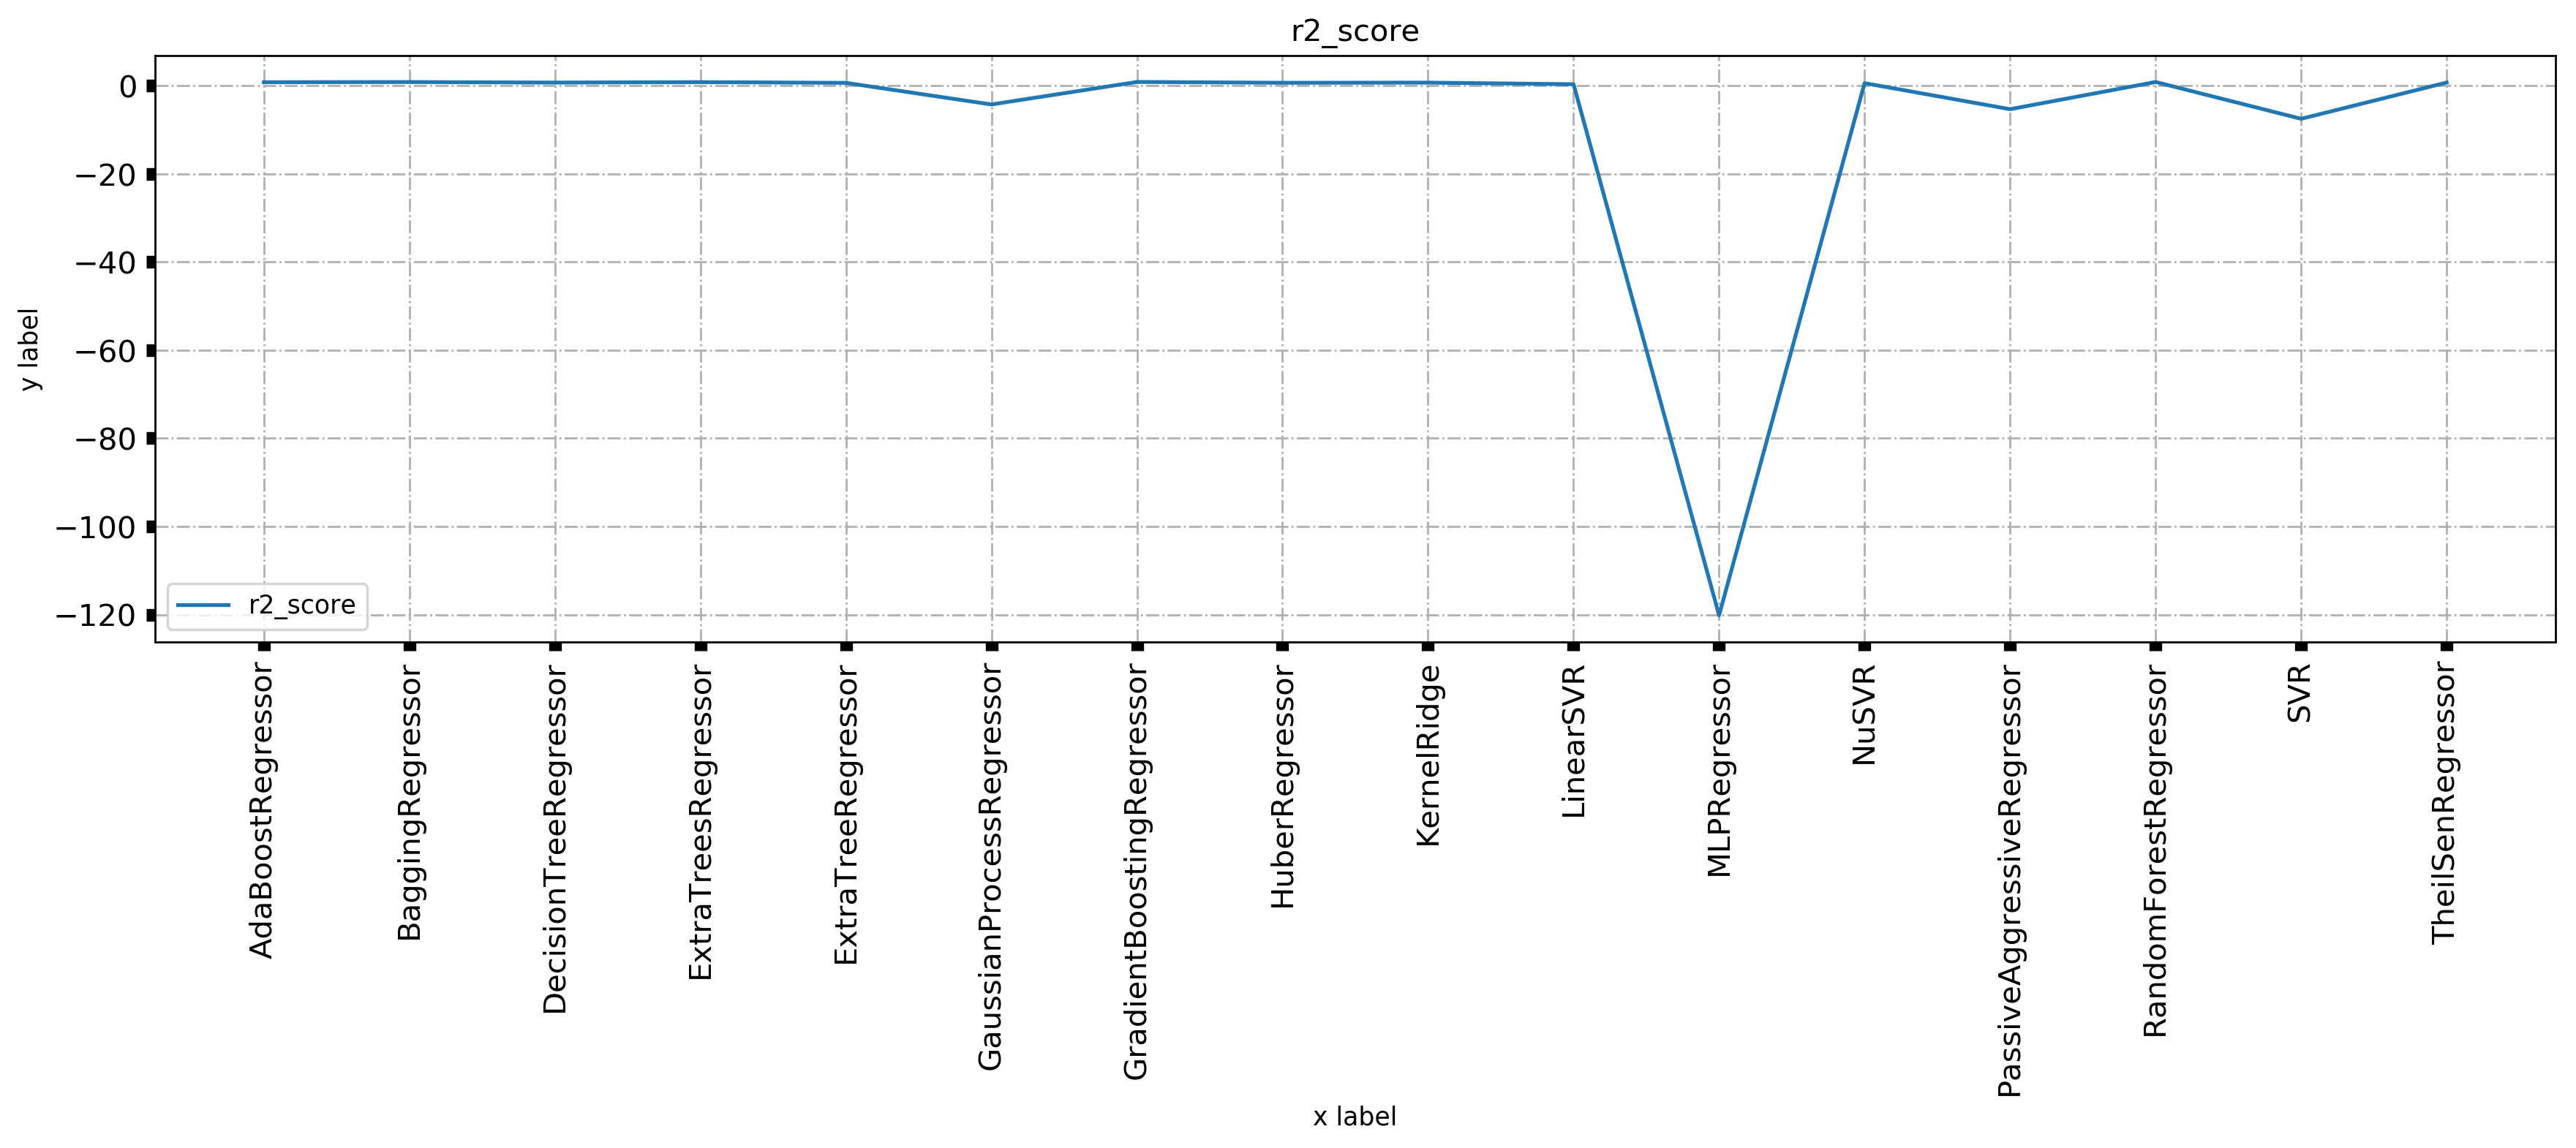

In [15]:
#Regression

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

labels= ['explained_variance_score',  'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']

for n in range(0,6):
    figure(num=None, figsize=(14, 6), dpi=250)
    
    ax = plt.subplot(111)
    
    plt.plot(evaluation['Model Name'],evaluation[labels[n]], label = labels[n])

    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    plt.xticks(rotation=90)
    # leg.get_frame().set_alpha(0.5)
    plt.legend()
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')

    plt.tight_layout()
    plt.xlabel('x label')
    plt.ylabel('y label')

    plt.title(labels[n])
    plt.show()


In [89]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.pyplot import figure


# figure(num=None, figsize=(14, 6), dpi=250)

# labels= ['accuracy', 'precision', 'recall', 'f1']
# ax = plt.subplot(111)

# for n in range(0,4):
#     plt.plot([name for name in evaluation],[evaluation[name][n] for name in evaluation], label = labels[n])

# leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
# plt.xticks(rotation=45)
# # leg.get_frame().set_alpha(0.5)
# plt.legend()
# ax.tick_params(labelsize='large', width=5)
# ax.grid(True, linestyle='-.')

# plt.tight_layout()
# plt.xlabel('x label')
# plt.ylabel('y label')

# plt.title("TITLE")
# plt.show()
